# Kaggle Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand
<br>
<br>
* Bike_Sharing_Demand.csv (10,886 * 12)
  * datetime : Date + Timestamp
  * season : 1(봄), 2(여름), 3(가을), 4(겨울)
  * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
  * workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
  * weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/번개)
  * temp : 온도(섭씨)
  * atemp : 체감온도(섭씨)
  * humidity : 습도
  * windspeed : 풍속
  * casual : 사전 등록되지 않은 사용자 대여 횟수
  * registered : 사전 등록된 사용자 대여 횟수
  * count : 총 대여 횟수 -> y

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [82]:
DF.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [12]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)

In [13]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


> ## 2) Drop Columns

* 'datetime', 'casual', 'registered'

In [ ]:
# drop_columns = ['datetime', 'casual', 'registered']

# DF.drop(drop_columns, axis = 1,inplace = True)

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [8]:
DF['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

# EDA
- datetime : 2011년 1월 1일 0시 부터 2012년 12월 19일 23시까지 시간 단위 데이터
1. 결측치 없음
2. 형 체크
- count, year, month, day,hour 칼럼을 데이터타입으로 형변환 필요??
- season, holiday, workingday, weather : 범주형-명목형, 인코딩 불필요
- temp, atemphumidity, windspeed : 수치형-연속적
- casual, registered, count : 수치형-연속적
3. 수치형 데이터 스케일링 필요

In [85]:
DF.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000


In [86]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## visualization

In [146]:
import matplotlib.pyplot as plt
import matplotlib as rc
from matplotlib import rcParams
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# 한글만 사용시 
rcParams['font.family'] = 'Malgun Gothic'

### 추세 체크

In [126]:
# 데이터가 너무 많으므로 월별 데이터로 리샘플링
numeric_col = ['count', 'casual', 'registered','temp', 'atemp', 'humidity', 'windspeed'] 
NDF = DF.loc[ : , numeric_col]
NDF.set_index(DF['datetime'], inplace=True)
NDF_M = NDF.resample(rule = 'M').median()
NDF_M.head()

,count,casual,registered,temp,atemp,humidity,windspeed
datetime,,,,,,,
2011-01-31,47.0,2.0,43.0,8.20,9.85,51.0,12.9980
2011-02-28,59.0,4.0,52.5,9.84,12.88,49.5,15.0013
2011-03-31,72.0,9.0,56.0,13.94,15.91,56.5,15.0013
2011-04-30,84.0,12.0,65.0,17.22,21.21,67.0,15.0013
2011-05-31,154.0,27.0,120.0,21.32,25.00,77.0,12.9980


In [127]:
# 수치연속형 데이터 시각화
def line_plot(df):
    fig = plt.figure(figsize=(10,20))
    cols = df.columns    
    fig.suptitle('월별 자전거 대여 수요 (수치연속형) 지표 추세 ', fontweight ="bold")
    for i in range(len(cols)):  
        plt.subplot(len(cols)+1, 2,i+1)
        plt.title(cols[i])
        plt.plot(df[cols[i]])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()   

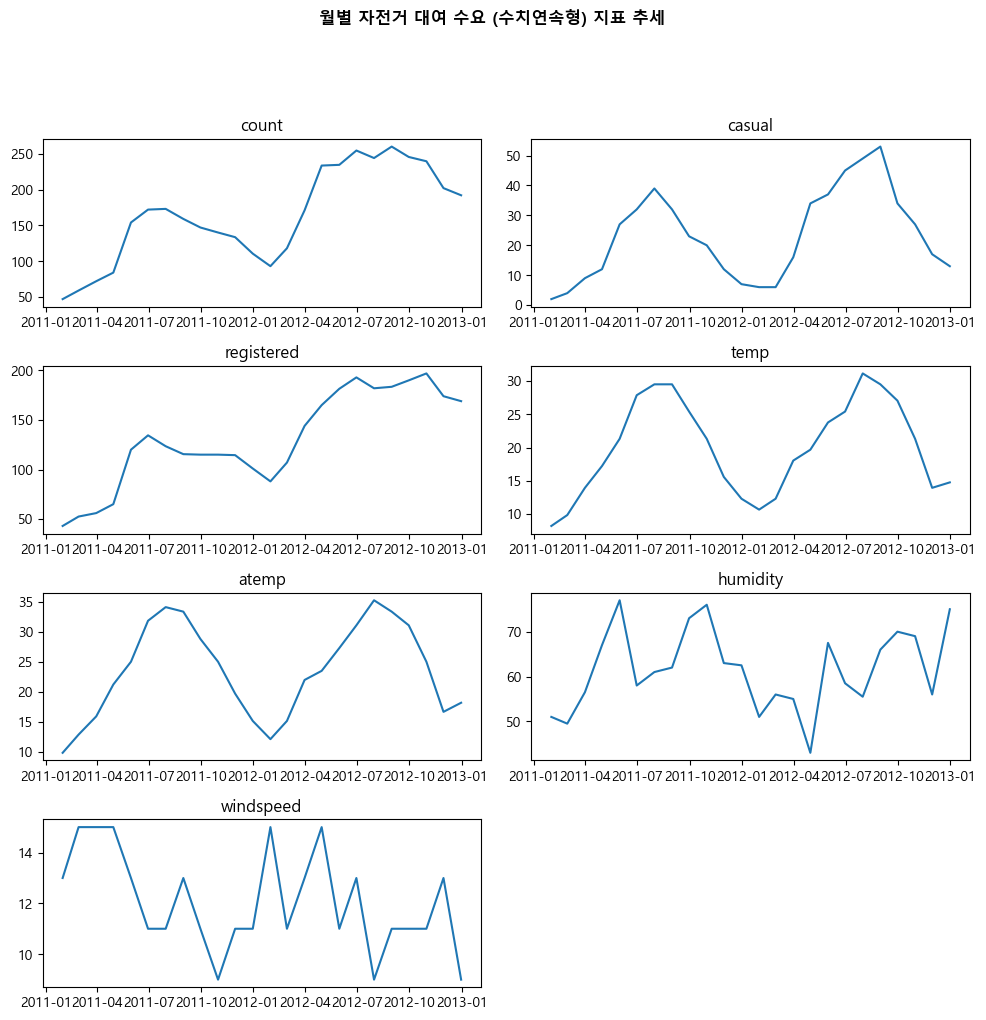

In [128]:
line_plot(NDF_M)

### 분포 체크

In [150]:
def hist_plot(df):
    fig = plt.figure(figsize=(10,20))
    cols = df.columns    
    fig.suptitle('월별 자전거 대여 수요 (수치연속형) 지표 전체 분포', fontweight ="bold")
    for i in range(len(cols)):  
        plt.subplot(len(cols)+1, 2,i+1)
        plt.title(cols[i])
        plt.hist(df[cols[i]])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()   

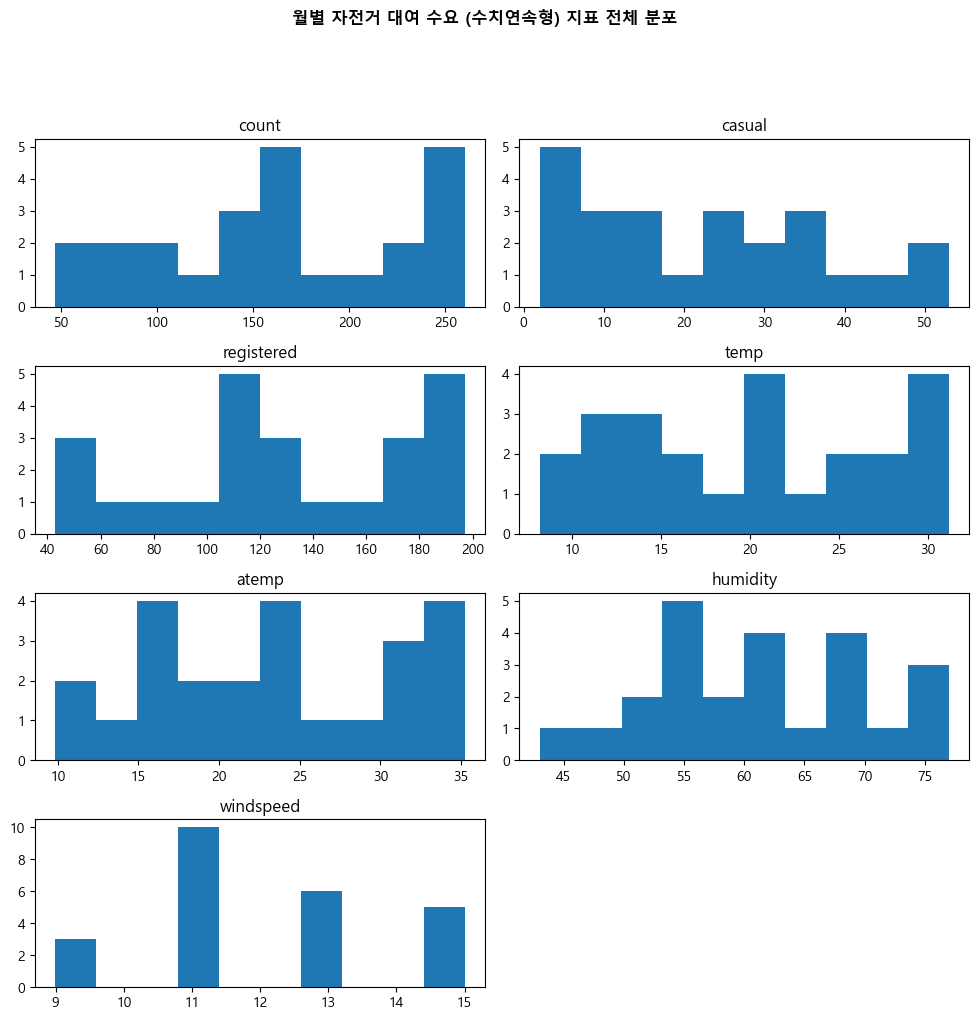

In [151]:
hist_plot(NDF_M)

### 백분위 체크
- 시계열 데이터이므로 월별로 쪼개 봐야함
- 전체 기준은 크게 의미가 없지만.. 시간없으므로넘어가자

In [94]:
# 월별 분포 체크
def box_plot(df, col):
    fig = plt.figure(figsize=(10,20))
    cols = df.columns    
    fig.suptitle('자전거 대여 수요 (수치연속형) 지표 월별 분포', fontweight ="bold")
    for i in range(len(cols)):  
        plt.subplot(len(cols)+1, 2,i+1)
        plt.title(cols[i])
        plt.boxplot(df[cols[i]])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()   

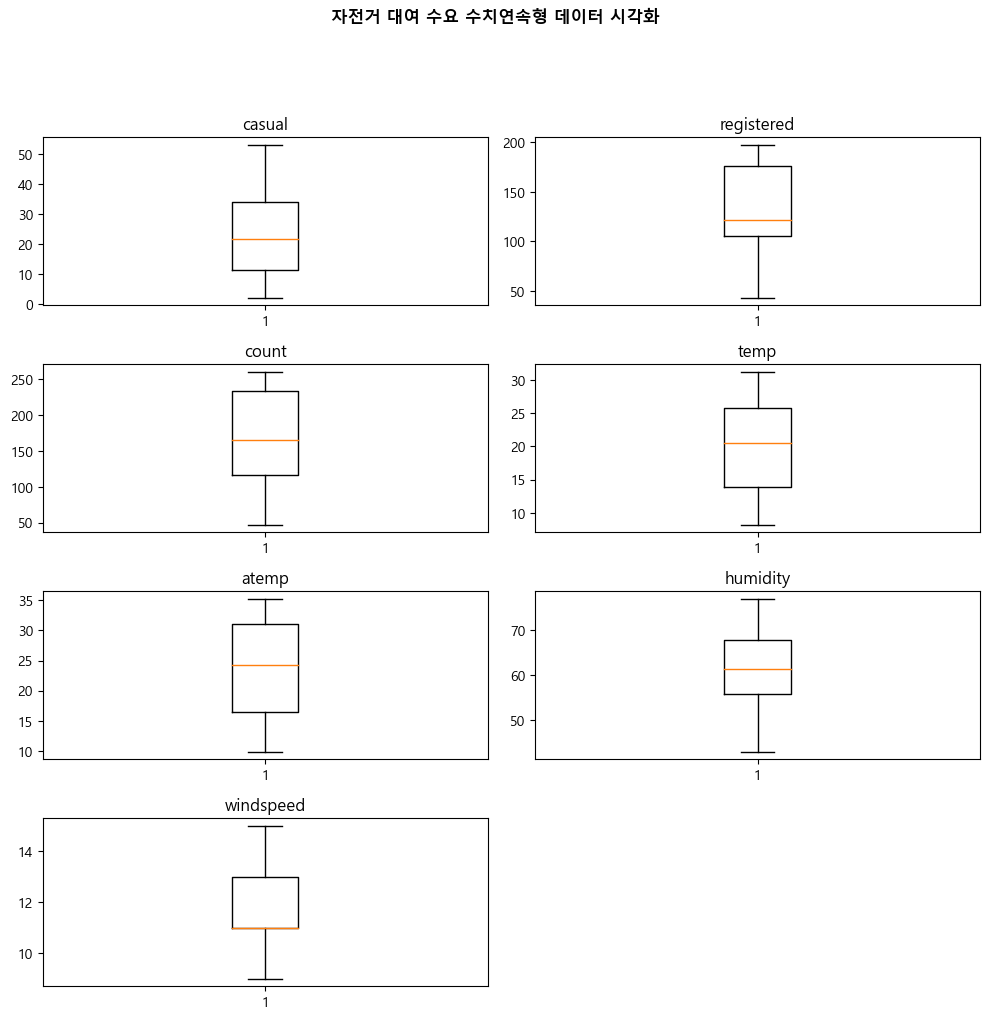

In [95]:
box_plot(NDF_M)

# 상관관계 분석

## raw data

In [134]:
DF.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


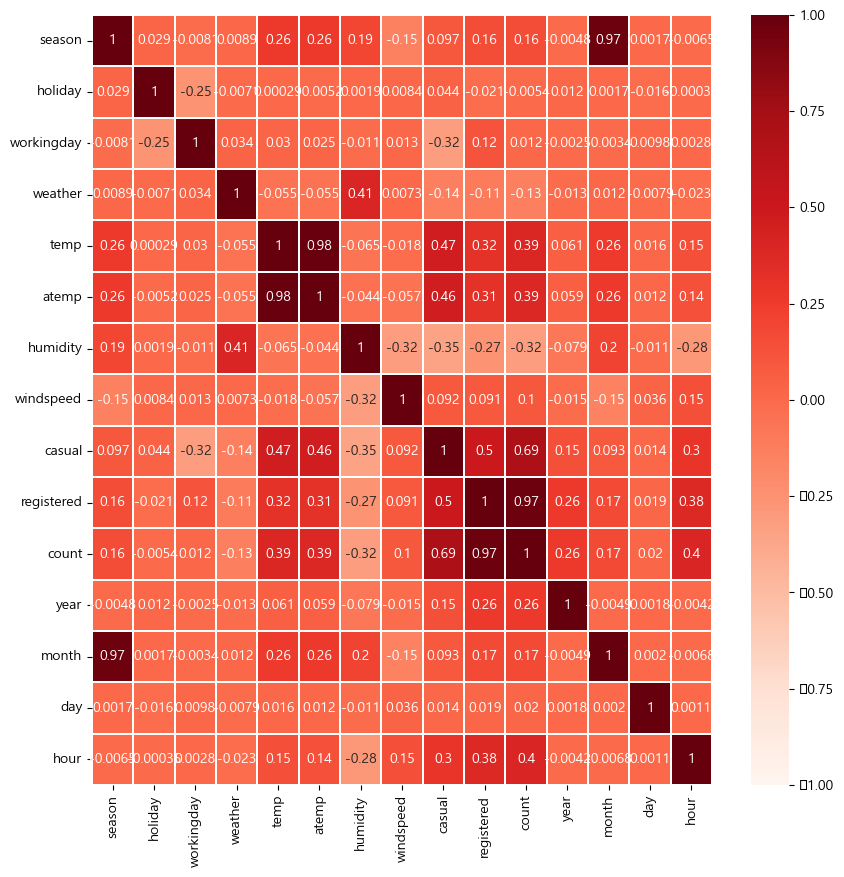

In [137]:
# registered 와 casual이 강관계성이고, hour, temp, atemp가 약한 관계성이 있다. 0.3 이상
plt.figure(figsize=(10,10))
sns.heatmap(DF.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds' )
plt.show()

In [157]:
feature_col = ['count', 'registered', 'casual', 'hour', 'temp', 'atemp']
FDF_M = DF.loc[:, feature_col]
FDF_M.head()

,count,registered,casual,hour,temp,atemp
0,16,13,3,0,9.84,14.395
1,40,32,8,1,9.02,13.635
2,32,27,5,2,9.02,13.635
3,13,10,3,3,9.84,14.395
4,1,1,0,4,9.84,14.395


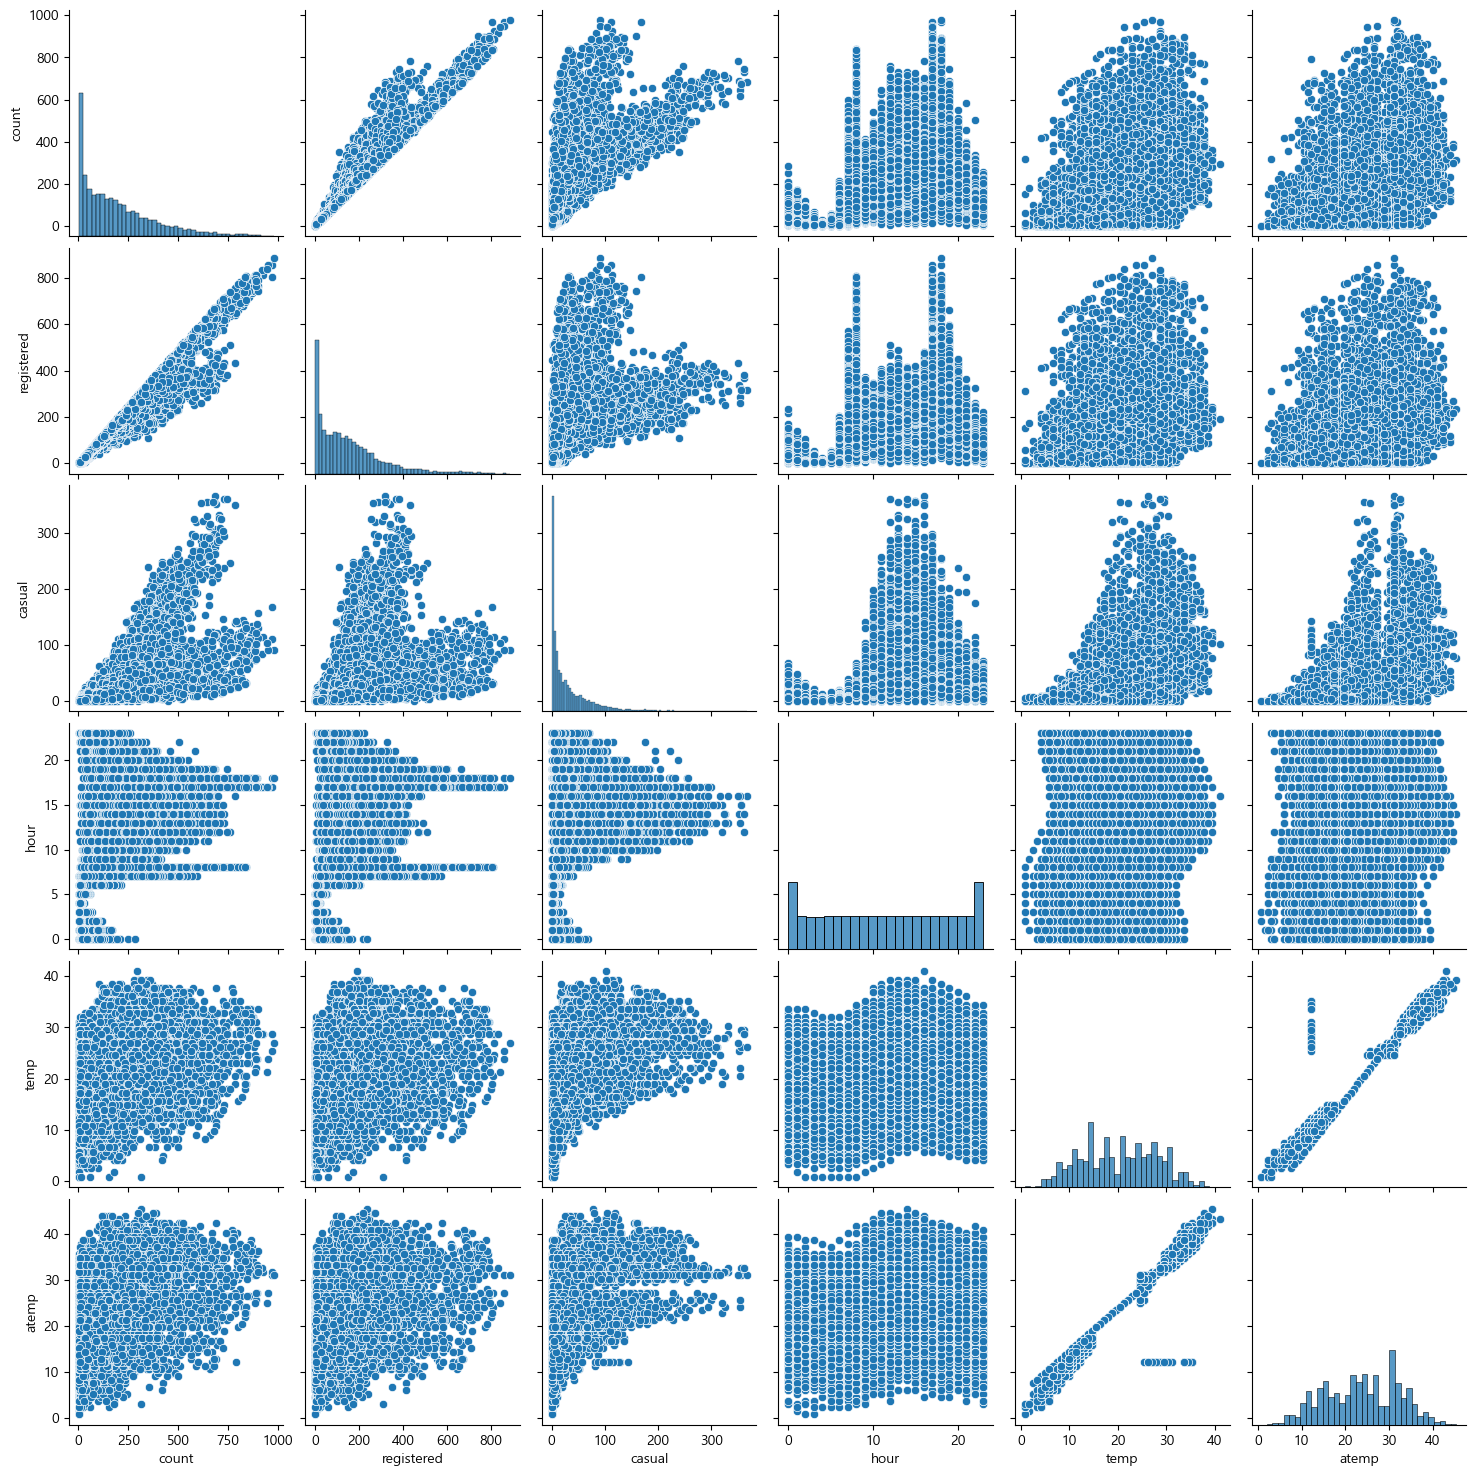

In [158]:
# registered 와 거의 1차원 선형을 보임
# causal은 2개의 선형을 보임, 나머지는 불규칙적임
sns.pairplot(FDF_M)

# encoding
- hour피처는 이미 정수형이므로 불필요

# scaling
- 갭이 크지 않으므로 불필요

# data split
- 모델링은 raw데이터로 해야지

In [160]:
from sklearn.model_selection import train_test_split

X = DF[feature_col[1:]]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 5) (7620,)
Test Data :  (3266, 5) (3266,)


In [168]:
X_train.head()

,registered,casual,hour,temp,atemp
6403,60,16,1,15.58,19.695
6668,7,0,3,20.50,24.240
9147,233,54,12,31.16,36.365
6134,62,1,20,6.56,6.060
8093,327,255,14,26.24,31.060


# modeling

In [161]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

# predict

In [163]:
y_hat = LR.predict(X_test)

# evaluation

In [166]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)

np.sqrt(mse1)

3.079024487319203e-13

In [178]:
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)
pred_DF

,y_hat,y_test
1600,44.0,44
514,91.0,91
6599,88.0,88
4374,147.0,147
10116,151.0,151
...,...,...
10778,453.0,453
4832,111.0,111
6168,72.0,72
2077,146.0,146


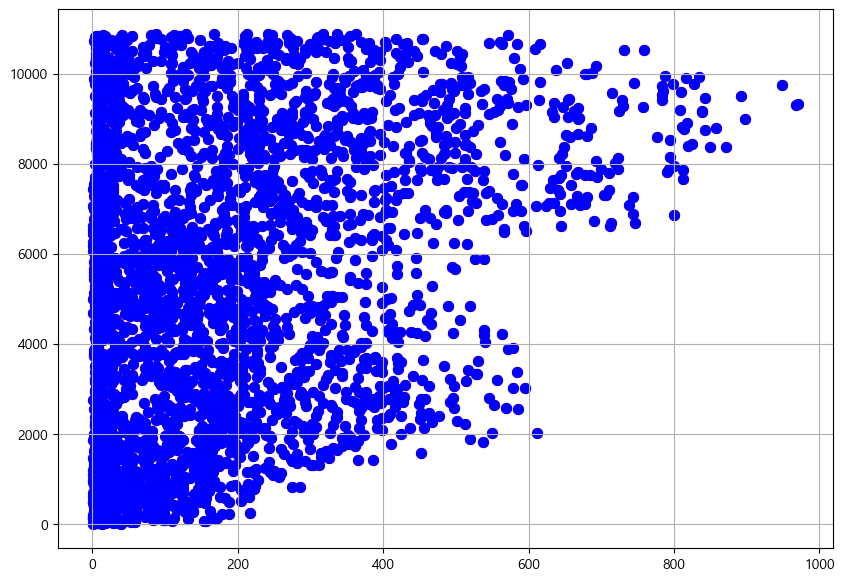

In [186]:
plt.figure(figsize = (10, 7))

plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()


# 
# 
# 
# The End
# 
# 
# 